## **001 Lecture**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


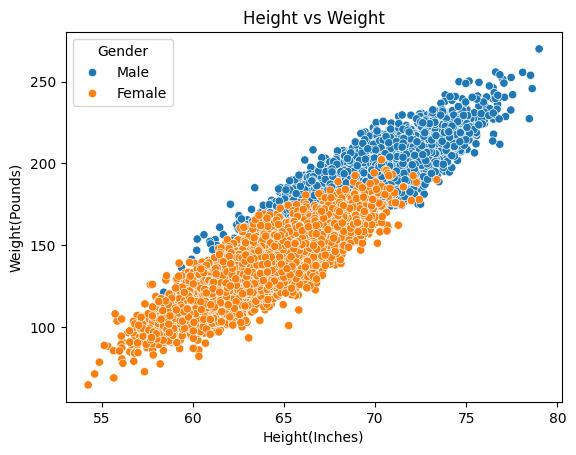

In [27]:
sns.scatterplot(x='Height',y='Weight',data=df,hue='Gender')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Height vs Weight')
plt.show()

In [28]:
### Encoding the gender column
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [30]:
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [8]:
df['Gender'].value_counts(normalize=True)

Gender
0    0.5
1    0.5
Name: proportion, dtype: float64

In [43]:
## Divide the data into independent and dependent features
# Correct syntax for dropping multiple, specific columns
X = df.drop(['Height', 'Gender'], axis=1) 
y = df['Height']

In [45]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 1)
(2000, 1)
(8000,)
(2000,)


In [46]:
### standardize the independent features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  ## Data likage ke liye fit nhi krenge. 

In [48]:
## train simple linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
w , b = lr.coef_, lr.intercept_
print('coefficients of the weights: ', w)
print('intercept: ', b)

coefficients of the weights:  [3.55479288]
intercept:  66.3596814074891


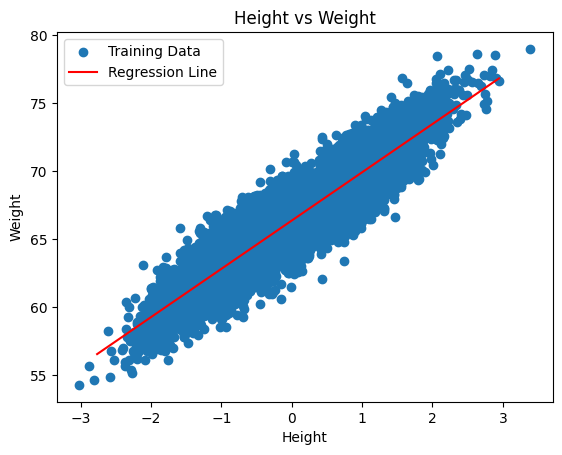

In [ ]:
# Flatten X_test if needed
X_test_flat = X_test.ravel()  # Converts (2000, 1) → (2000,)

# Predict
y_pred = lr.predict(X_test)

# Sort for smooth line
sorted_indices = X_test_flat.argsort()
X_sorted = X_test_flat[sorted_indices]
y_sorted = y_pred[sorted_indices]

# Plot
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_sorted, y_sorted, color='r', label='Regression Line')  # This works!
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

#### **Prediction of train data**
- 1.predicted height output = intercept + coef_(weights)
- 2.y_pred_train = 66.3596814074891 + 3.55479288*(X_train)

#### **Prediction of test data**
- 1.predicted height output = intercept + coef_(weight)
- 2.y_pred_test = 66.3596814074891 + 3.55479288 * (X_test)

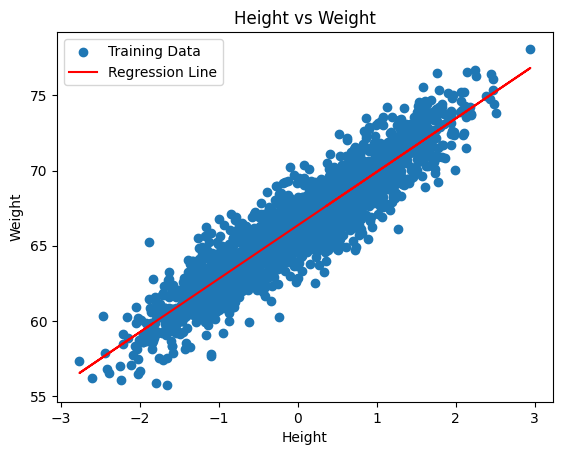

In [69]:
plt.scatter(X_test, y_test, label='Training Data')
plt.plot(X_test_flat, y_pred, color='r', label='Regression Line')  
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

In [71]:
## Performance matrics , mse , rmse , mae
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)

R2:  0.8578120230894554
MSE:  2.112361948474147
RMSE:  1.4533966934303062
MAE:  1.1588656330992098


In [72]:
### Adjusted R2
from sklearn.metrics import r2_score
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print('Adjusted R2: ', adjusted_r2)

Adjusted R2:  0.8577408579358465


In [73]:
lr

LinearRegression()

In [76]:
scaled_weight = sc.transform([[80]])
scaled_weight

c:\Users\rehma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.53816571]])

In [77]:
print(lr.predict(scaled_weight))

[57.33702802]


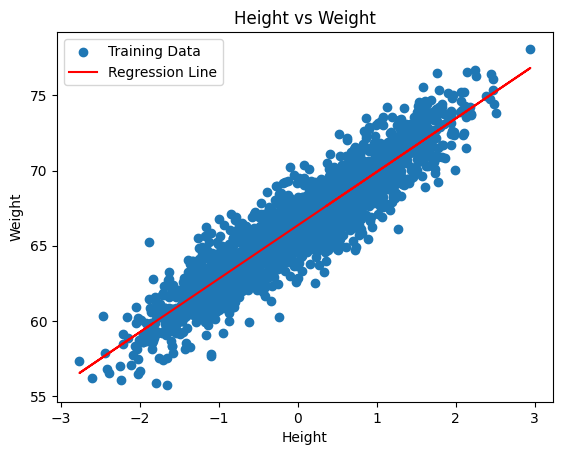

In [78]:
### Assumption  if model is performing well.

## plot scatter plot for predictions
plt.scatter(X_test, y_test, label='Training Data')
plt.plot(X_test_flat, y_pred, color='r', label='Regression Line')  
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

In [79]:
### Residuals
residuals = y_test - y_pred
residuals

6252    1.019636
4684   -1.284143
1731   -0.947915
4742   -0.390533
4521   -1.690374
          ...   
6412    1.525611
8285   -1.039337
7853   -0.160441
1095   -2.203274
6929   -1.197101
Name: Height, Length: 2000, dtype: float64

C:\Users\rehma\AppData\Local\Temp\ipykernel_18776\897792914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


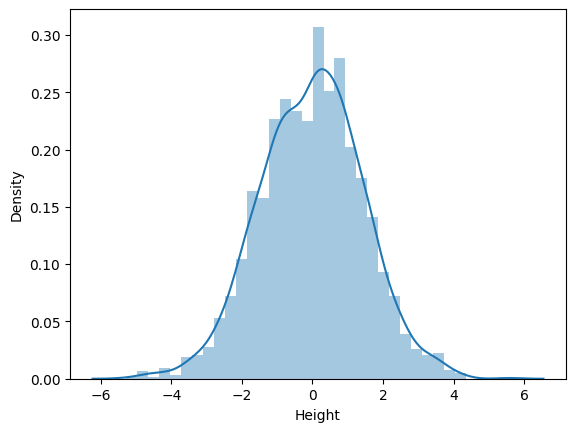

In [80]:
sns.distplot(residuals)
plt.show()

- if displot is normal then residuals are normally distributed and we can say that model is performing well

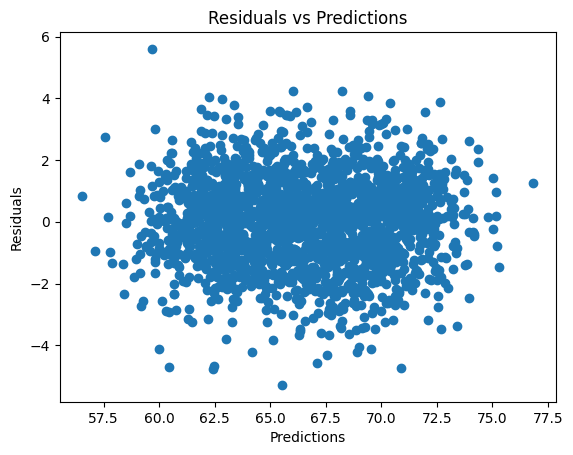

In [81]:
#### scatter plot with respect to prediction and residuals
#### uniform distribution of residuals with respect to predictions that means our model is performing well.

plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.show()